In [50]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os

xfmt = ScalarFormatter()
xfmt.set_powerlimits((6,6))
xfmt.useMathText = True

#os.system("source ~/software/root6/build/bin/thisroot.sh")
! source /home/watchman/software/root_v6-18-00/bin/thisroot.sh
#import ROOT

In [51]:
data_dir = "/home/watchman/Documents/lappdsoft/lappd/data/tts"

In [52]:
pc_voltages = [10,20,30,40,50,60,70,80,90,100,150,200]
mcp_voltages = [825]
tts_values = [188, 116, 96.3, 88.4, 78.8, 79.1, 77.0, 71.7, 71.5, 71.4, 70.5, 68.4]
tts_errs = [4.4, 2.4, 2.0, 2.1, 1.6, 1.7, 1.6, 1.5, 1.5, 1.5, 1.4, 1.5]

In [53]:
tts_binmin = 39
tts_binmax = 43
tts_bin_width = 0.05
tts_bins = np.arange(tts_binmin, tts_binmax, tts_bin_width)

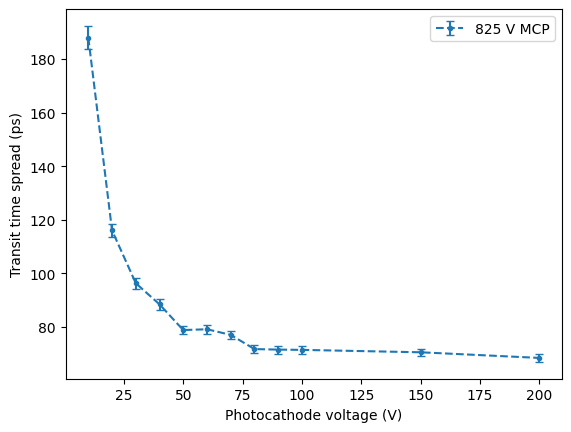

In [54]:
plt.errorbar(pc_voltages, tts_values, yerr=tts_errs, linestyle="--", marker="o", markersize=3, capsize=3, label="825 V MCP")
plt.xlabel("Photocathode voltage (V)")
plt.ylabel("Transit time spread (ps)")
plt.legend()
plt.show()

In [55]:
tts = {}

for mcp_voltage in mcp_voltages:
    tts[mcp_voltage] = {}
    for pc_voltage in pc_voltages:
        try:
            tts[mcp_voltage][pc_voltage] = np.load(f"{data_dir}/MCP{mcp_voltage}/PC{pc_voltage}_tts.npy")
        except FileNotFoundError:
            print(f"Could not find file for MCP voltage {mcp_voltage} and photocathode voltage {pc_voltage}")

In [56]:
def plot_hist(mcp, pc):
    print(f"Plotting {mcp} MCP and {pc} PC")
    try:
        plt.hist(tts[mcp][pc], tts_bins, histtype="step", label=f"{pc} V PC; {mcp} V MCP", density=True, alpha=0.8)
    except KeyError:
        pass

vec_plot_hist = np.vectorize(plot_hist, otypes=[None])

Plotting 825 MCP and 10 PC
Plotting 825 MCP and 50 PC
Plotting 825 MCP and 100 PC
Plotting 825 MCP and 200 PC


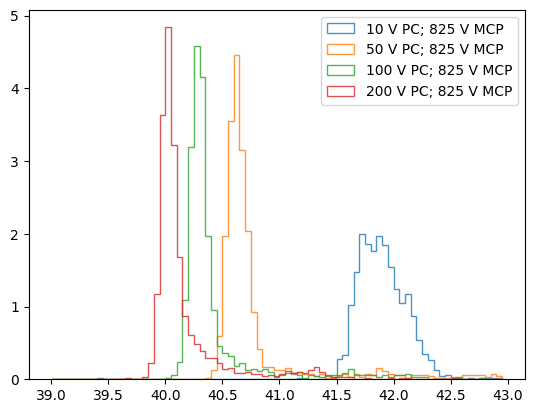

In [59]:
vec_plot_hist(825, [10,50,100,200])
plt.legend()
plt.show()